In [113]:
# Importation des bibliothèques
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
import numpy as np

In [114]:
# Chargement et stockage du dataset des fleurs d'iris
iris = load_iris()

In [115]:
# Visualisation des données
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [116]:
X = iris['data']
y = iris['target']

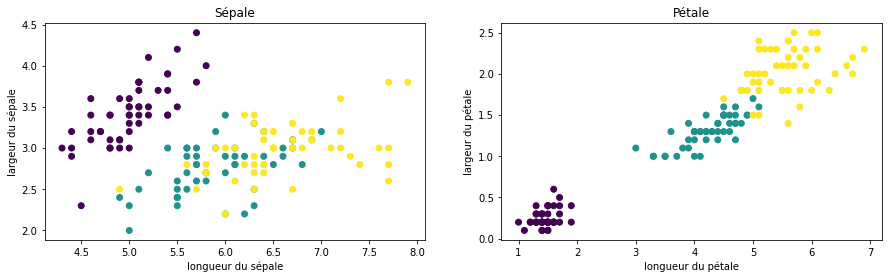

In [117]:
plt.figure(figsize=(15, 4))
plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c=y)
plt.title('Sépale')
plt.xlabel('longueur du sépale')
plt.ylabel('largeur du sépale')
plt.subplot(1,2,2)
plt.title('Pétale')
plt.xlabel('longueur du pétale')
plt.ylabel('largeur du pétale')
plt.scatter(X[:,2], X[:,3], c=y)

# Construction du Dataframe et élaboration du modèle

In [118]:
dataset = pd.DataFrame({'petal_length':X[:,2], 'petal_width':X[:,2], 'target':y})
X = dataset.drop('target', axis=1)
y = dataset['target']

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [121]:
from sklearn.neighbors import KNeighborsClassifier

In [122]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.9583333333333334

In [123]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [124]:
model = make_pipeline(StandardScaler(), KNeighborsClassifier())
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [125]:
params = {
    'kneighborsclassifier__n_neighbors':np.arange(1,11),
    'kneighborsclassifier__metric':['euclidean', 'minkowski']
}

In [126]:
grid = GridSearchCV(model, param_grid=params, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__metric': ['euclidean',
                                                          'minkowski'],
                         'kneighborsclassifier__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])})

In [127]:
grid.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=8))])

In [128]:
grid.best_score_

0.9583333333333333

In [129]:
from sklearn.metrics import confusion_matrix

In [130]:
confusion_matrix(grid.predict(X_test), y_test)

array([[10,  0,  0],
       [ 0,  8,  0],
       [ 0,  2, 10]], dtype=int64)